In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

from src.code.simulation.galton_watson import GaltonWatson
from src.code.simulation.utils import plot_zn_distribution, test_loi_exponentielle
from src.config.config import seed
from src.utils.utils import init_notebook

In [2]:
init_notebook(seed)

# Simulation Galton-Watson

## Loi de Poisson

### λ = 1

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Poisson}}(1)$.

In [3]:
poisson_1 = stats.poisson(1)

In [4]:
gp1 = GaltonWatson(poisson_1)
gp1

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [5]:
nb_survivants = gp1.simule(20)

In [6]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 0 survivants au bout de 10 époques.


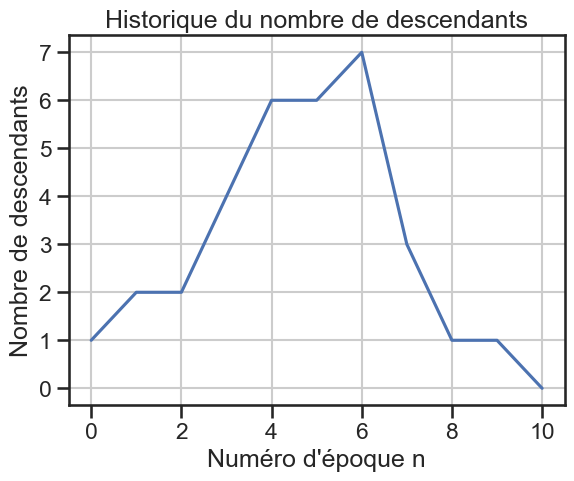

In [7]:
gp1.plot_historique_descendants()

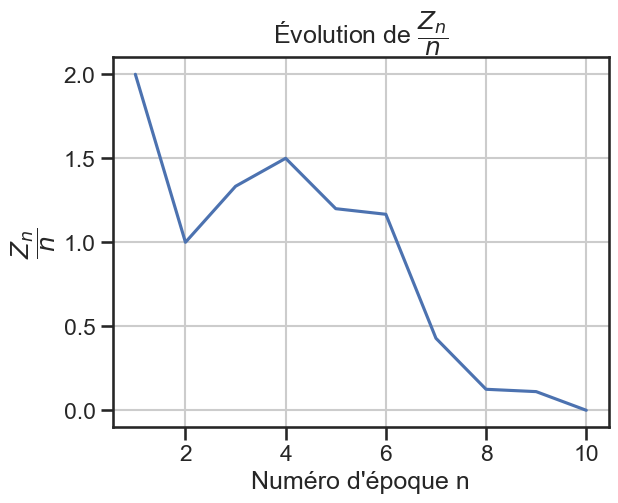

In [8]:
# noinspection JupyterPackage
gp1.plot_zn_sur_n()

#### Arbre de Galton-Watson

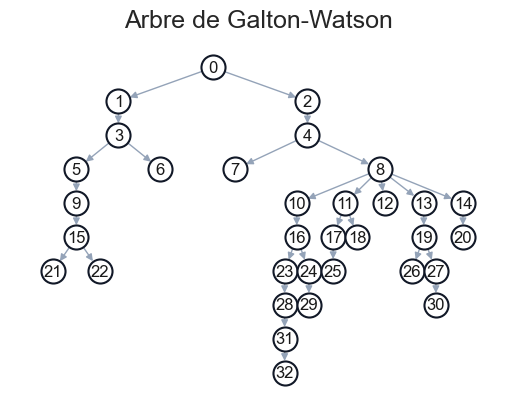

In [9]:
gp1.plot_arbre()

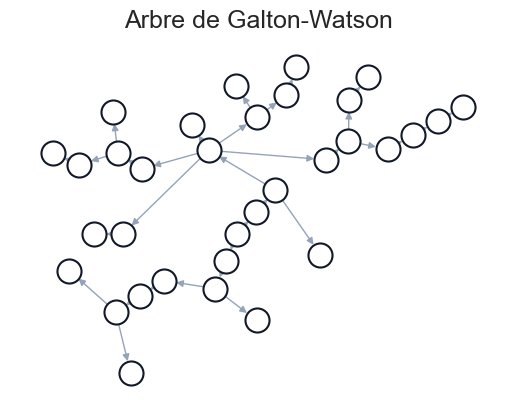

In [10]:
gp1.plot_arbre(with_labels=False, circular=True)

### λ = 2

In [10]:
poisson_2 = stats.poisson(2)

In [11]:
gp2 = GaltonWatson(poisson_2)
gp2

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 2.0
- époque n = 0
- nombre de survivants Z_n = 1

In [12]:
nb_survivants = gp2.simule(20)

In [13]:
print(f"Il reste {nb_survivants} survivants au bout de {gp2.n} époques.")

Il reste 680149 survivants au bout de 20 époques.


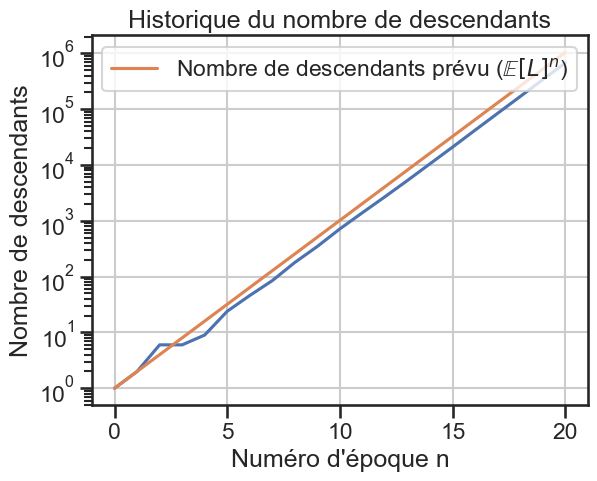

In [14]:
gp2.plot_historique_descendants(logscale=True, affiche_moyenne=True)

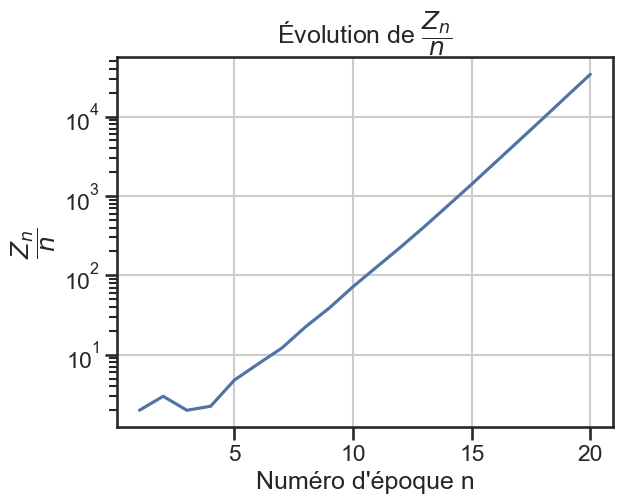

In [15]:
gp2.plot_zn_sur_n(logscale=True)

## Essais $Z_n / n$

In [16]:
nb_simulations = 10_000
nb_epoques = 100

In [17]:
simulations = gp1.lance_simulations(nb_simulations, nb_epoques)
simulations = np.array(simulations)

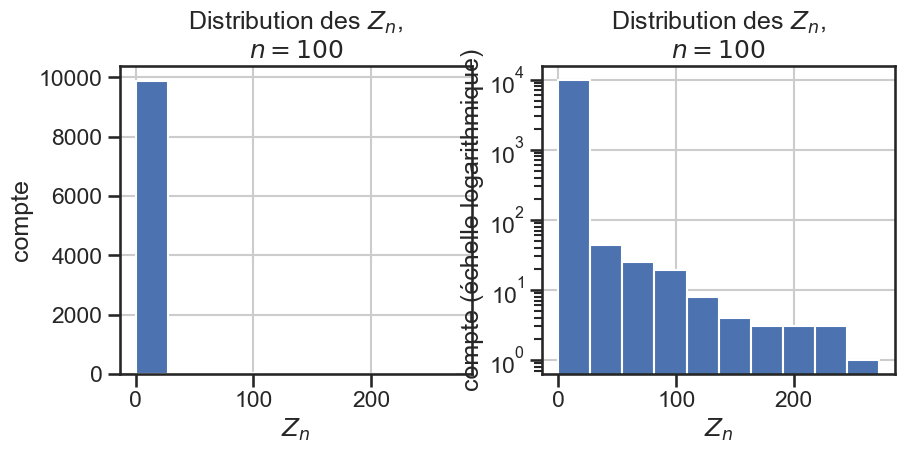

In [18]:
plot_zn_distribution(simulations, nb_epoques)

In [19]:
np.sum(simulations > 0)

191

In [20]:
zn_sup_zero = simulations[simulations > 0]

(array([83., 43., 26., 17.,  8.,  4.,  3.,  3.,  3.,  1.]),
 array([  1. ,  28.1,  55.2,  82.3, 109.4, 136.5, 163.6, 190.7, 217.8,
        244.9, 272. ]),
 <BarContainer object of 10 artists>)

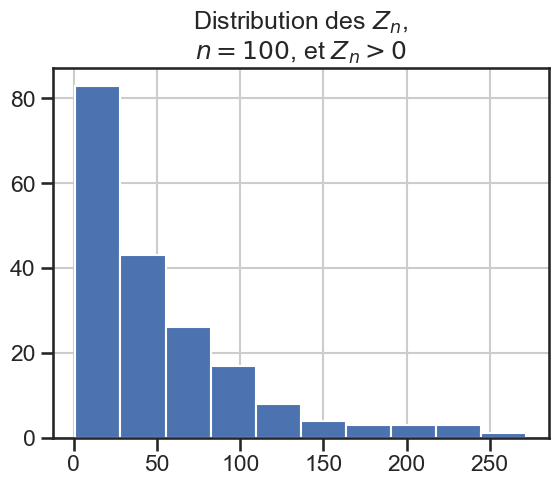

In [21]:
plt.title("Distribution des $Z_n$,\n$n = 100$, et $Z_n > 0$")
plt.hist(zn_sup_zero)

In [22]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 1.902959051509415


In [23]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [24]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

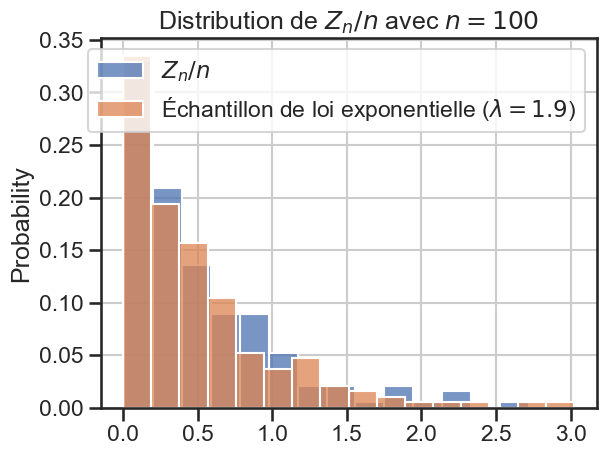

In [25]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability", label="$Z_n / n$")
sns.histplot(
    echantillon_expo,
    stat="probability",
    label=f"Échantillon de loi exponentielle ($\\lambda = {lambda_estime: 0.2}$)",
)

plt.legend()

In [26]:
test_loi_exponentielle(zn_sup_zero / nb_epoques)

(0.531818713902256, 0.057586680541798524)

## Loi uniforme sur {0, 1, 2}

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Uniforme}}(0, 2)$.

In [27]:
uniforme2 = stats.randint(0, 3)

In [28]:
gu2 = GaltonWatson(uniforme2)
gu2

Processus Galton-Watson
- loi de reproduction L : randint
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [29]:
nb_survivants = gu2.simule(100)

In [30]:
print(f"Il reste {nb_survivants} survivants au bout de {gu2.n} époques.")

Il reste 23 survivants au bout de 100 époques.


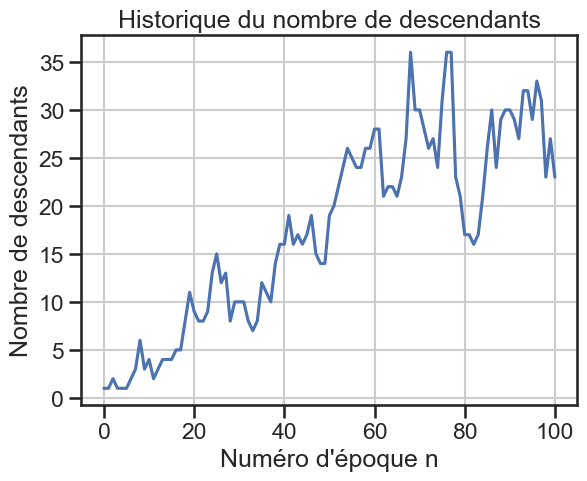

In [31]:
gu2.plot_historique_descendants()

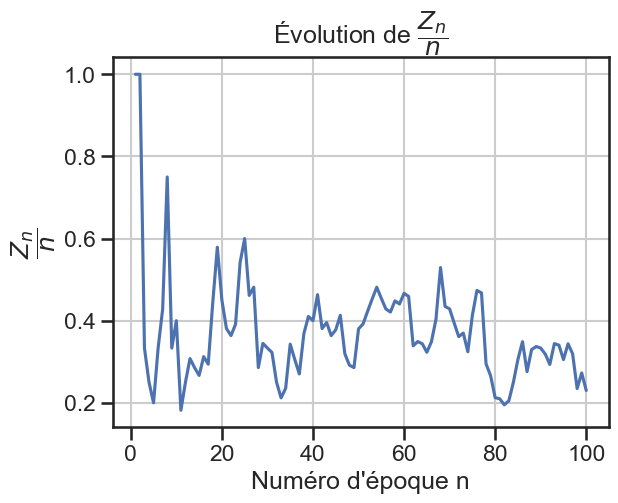

In [32]:
gu2.plot_zn_sur_n()

#### Arbre de Galton-Watson

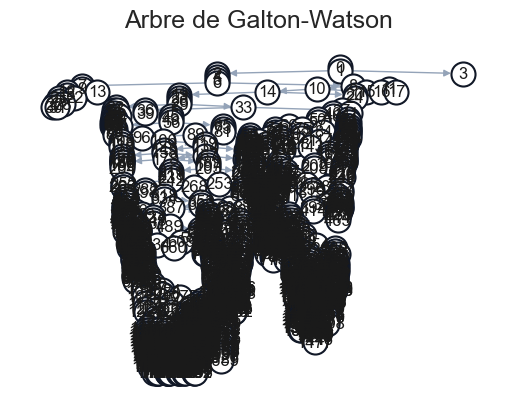

In [33]:
gu2.plot_arbre()

## Essais $Z_n / n$

In [34]:
nb_simulations = 10_000
nb_epoques = 100

simulations = gu2.lance_simulations(nb_simulations, nb_epoques)

In [35]:
simulations = np.array(simulations)

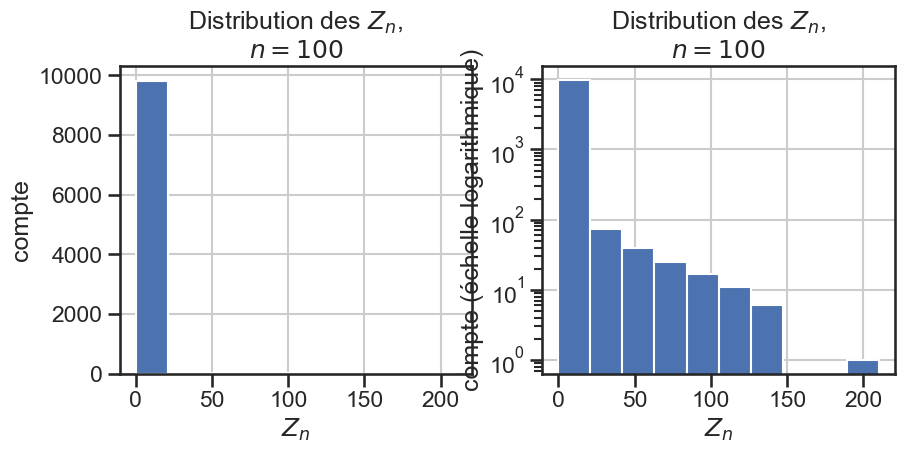

In [36]:
plot_zn_distribution(simulations, nb_epoques)

In [37]:
np.sum(simulations > 0)

295

In [38]:
zn_sup_zero = simulations[simulations > 0]

(array([125.,  73.,  39.,  25.,  17.,   9.,   6.,   0.,   0.,   1.]),
 array([  1. ,  21.9,  42.8,  63.7,  84.6, 105.5, 126.4, 147.3, 168.2,
        189.1, 210. ]),
 <BarContainer object of 10 artists>)

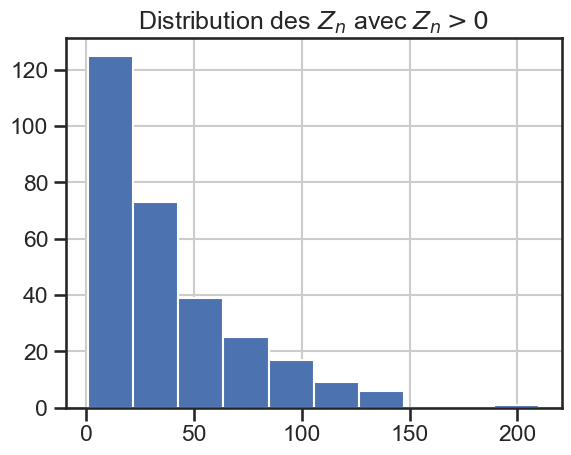

In [39]:
plt.title("Distribution des $Z_n$ avec $Z_n > 0$")
plt.hist(zn_sup_zero)

In [40]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 2.6538323137819364


In [41]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [42]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

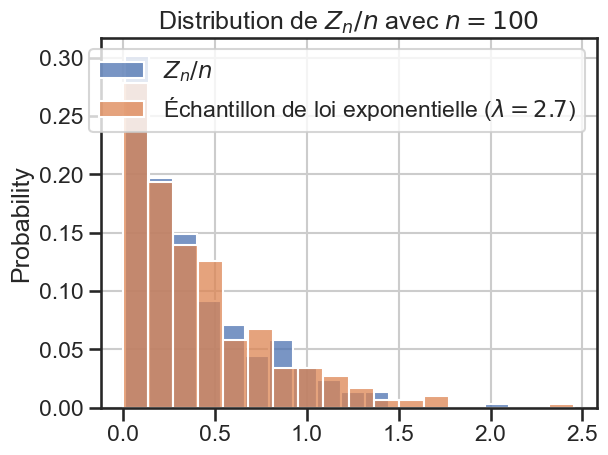

In [43]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability", label="$Z_n / n$")
sns.histplot(
    echantillon_expo,
    stat="probability",
    label=f"Échantillon de loi exponentielle ($\\lambda = {lambda_estime: 0.2}$)",
)

plt.legend()

In [44]:
p_value, _ = test_loi_exponentielle(zn_sup_zero / nb_epoques)

## Expérimentations

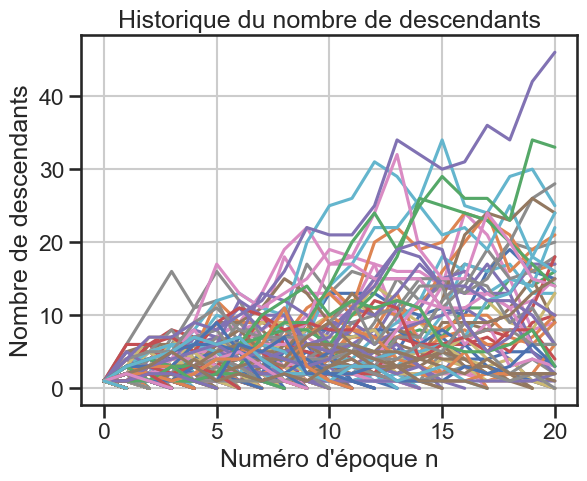

In [45]:
for _ in range(500):
    gp1.reset()
    gp1.simule(20)
    gp1.plot_historique_descendants()

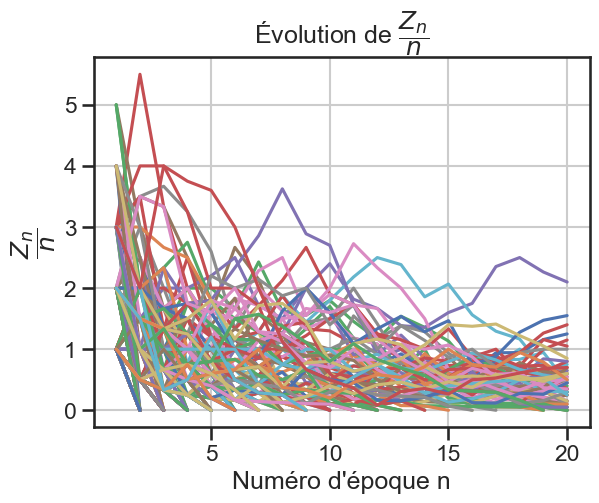

In [46]:
for _ in range(500):
    gp1.reset()
    gp1.simule(20)
    gp1.plot_zn_sur_n()